In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, Marr2Algorithms
import numpy as np
import seaborn as sb
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()


In [2]:
#ms = np.load('ms.npy')
#p_inits = np.load('p_inits.npy')
#strike_params = np.load('strike_params.npy')

In [3]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
[Counter({1: 112, 2: 19, 3: 8}), Counter({1: 62, 2: 53, 3: 24}), Counter({1: 59, 2: 58, 3: 22}), Counter({1: 82, 2: 37, 3: 20}), Counter({1: 102, 2: 21, 3: 16})]


In [4]:
simlist_by_hunt[2]

(<__main__.PreyCap_Simulation instance at 0x7f9487447b90>,
 <__main__.PreyCap_Simulation instance at 0x7f94848f7830>,
 <__main__.PreyCap_Simulation instance at 0x7f94848f73f8>,
 <__main__.PreyCap_Simulation instance at 0x7f948740afc8>,
 <__main__.PreyCap_Simulation instance at 0x7f9484980ef0>)

In [4]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.marr_bdb_file.np_prng

In [5]:
marralgs.run_marr2_models()

in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


In [8]:
marralgs = Marr2Algorithms(np.array(p_inits[0:2]), strike_params)
marralgs.run_marr2_models()


in bayes
{'Para Alt': 0.21946309470753914, 'Para Az': -0.87878194986387825, 'Para Dist': 314.59252497452428}
{'Para Alt': 0.24888271368568035, 'Para Az': -0.41734288597898306, 'Para Dist': 286.96179824877794}
{'Para Alt': 0.34630985221486049, 'Para Az': 0.22164247073442184, 'Para Dist': 217.95294779615608}
{'Para Alt': 0.69232131451982393, 'Para Az': -0.065001753447018251, 'Para Dist': 162.63795683015897}
{'Para Alt': 0.9442427025512663, 'Para Az': 0.21858068035556216, 'Para Dist': 144.97942663383529}
{'Para Alt': 0.19225918441074211, 'Para Az': 0.24201327629701111, 'Para Dist': 138.01875531568672}
{'Para Alt': 0.091159282892932958, 'Para Az': -0.16298869656702578, 'Para Dist': 52.487400948080051}
{'Para Alt': 0.40884751764809779, 'Para Az': -0.04288735649735434, 'Para Dist': 72.915532081880713}


in bayes
0
1
2
3
4
5
6
0
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
0
1
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
0
1
2
3
0
1
2
3
4
5
6
7
0
1
0
1
2
3
4
5
6
7
8
0
1
0
1
2
3
4
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
0
1
2
0
1
2
0
1
2
3
0
1
2
3
4
5
6
0
1
0
1
2
3
4
0
1
2
3
4
5
6
7
0
1
2
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
0
1
2
3
4
5
6
0
1
0
0
1
2
3
4
5
0
1
2
3
0
1
2
0
1
2
0
1
2
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
0
0
1
2
3
4
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
0
1
0
1
2
3
4
0
1
0
1
2
0
1
2
3
4
5
0
1
2
0
0
1
2
0
1
2
3
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
0
1
2
0
1
0
1
0
0
1
2
0
1
2
3
4
0
1
0
1
2
3
0
1
2
3
4
0
1
2
3
4
5
6
7
0
1
2
0
0
1
2
0
1
2
0
0
1
0
1
2
0
0
1
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
0
1
2
3


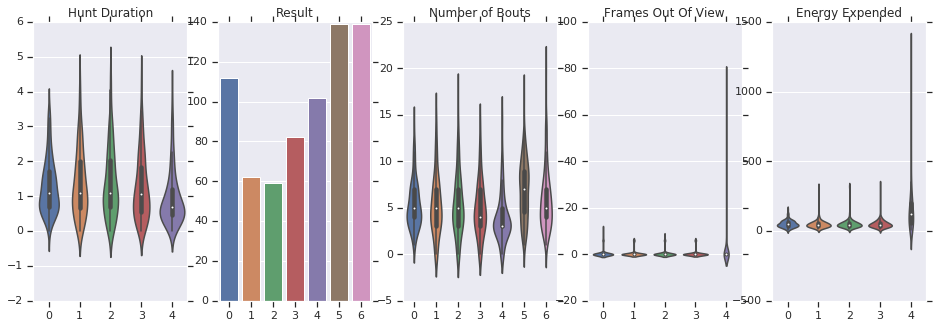

In [4]:
fig = plot_query(ms, p_inits, strike_params, 'violin')
fig.savefig('model_results.pdf')

In [ ]:
para_var